# Airports with most incidents of bird strikes – Top 50

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/jalad/Downloads/Bird Strikes data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()


C:\Users\jalad\AppData\Local\Temp\ipykernel_34848\1204121911.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [2]:
# Get a summary of the DataFrame
df_info = df.info()

# Display the summary
print(df_info)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

 Checking Missing values

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values per column
print(missing_values)

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

Converted 'FlightDate' column has dates in the format 'MM/DD/YY'

In [4]:

# Convert FlightDate to datetime if necessary
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%m/%d/%y', errors='coerce')

# Display the DataFrame to check the conversion
print(df[['FlightDate']].head())

  FlightDate
0 2000-11-23
1 2001-07-25
2 2001-09-14
3 2002-09-05
4 2003-06-23


In [5]:
# Remove rows with missing values in the specified columns
df_cleaned = df.dropna(subset=['Aircraft: Type', 'Airport: Name', 'Altitude bin'])

# Display the number of rows removed and information about the cleaned DataFrame
rows_removed = len(df) - len(df_cleaned)





primary focus is on the frequency of bird strikes rather than their impact, So I excluded this column from the main analysis. 
Effect: Impact to flight                   

In [8]:
# Dropping the 'Effect: Impact to flight' column
df.drop(columns=['Effect: Impact to flight'], inplace=True)
df.drop(columns=['Remarks'], inplace=True)
# Display the remaining columns to confirm the drop
print(df.columns)


Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'FlightDate',
       'Effect: Indicated Damage', 'Aircraft: Number of engines?',
       'Aircraft: Airline/Operator', 'Origin State', 'When: Phase of flight',
       'Conditions: Precipitation', 'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')


Airports with most incidents of bird strikes – Top 50," it's important to retain the differentiation between incidents with and without precipitation. Thus, keeping "None" as is or replacing it with "No Precipitation" would maintain the integrity of your analysis.

In [9]:
df['Conditions: Precipitation'] = df['Conditions: Precipitation'].replace('None', 'No Precipitation')
df['Conditions: Precipitation'] = df['Conditions: Precipitation'].fillna('No Precipitation')


In [10]:
pd.set_option('display.max_rows', None)  
print(df[['Conditions: Precipitation']].head(10))  # Display the first 10 rows


  Conditions: Precipitation
0          No Precipitation
1          No Precipitation
2          No Precipitation
3          No Precipitation
4          No Precipitation
5          No Precipitation
6          No Precipitation
7          No Precipitation
8          No Precipitation
9          No Precipitation


In [ ]:
Aircraft: Number of engines?

In [12]:
import pandas as pd

# Convert 'Aircraft: Number of engines' to numeric, coercing errors to NaN
df['Aircraft: Number of engines?'] = pd.to_numeric(df['Aircraft: Number of engines?'], errors='coerce')

# Calculate the mode
mode_value = df['Aircraft: Number of engines?'].mode()[0]
# Fill NaN values with the mode
df['Aircraft: Number of engines?'] = df['Aircraft: Number of engines?'].fillna(mode_value)
# Verify that there are no more NaN values
print(df['Aircraft: Number of engines?'].isna().sum())

0


origin states

In [13]:

# Calculate the mode of the column
mode_value = df['Origin State'].mode()[0]

# Fill NaN values with the mode
df['Origin State'] = df['Origin State'].fillna(mode_value)
# Verify that there are no more NaN values
print(df['Origin State'].isna().sum())

0


In [ ]:
Finally checking missing values in the dataset 

In [14]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values per column
print(missing_values)

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of 

In [18]:
# Convert 'Wildlife: Number struck' to numeric, if necessary
df['Wildlife: Number struck'] = pd.to_numeric(df['Wildlife: Number struck'], errors='coerce')


In [32]:
# Get summary statistics for 'Wildlife: Number Struck Actual'
summary = df['Wildlife: Number Struck Actual'].describe()

print(summary)

count    25429.000000
mean         2.699634
std         12.825804
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        942.000000
Name: Wildlife: Number Struck Actual, dtype: float64


# Distibution of Wildlife: Number Struck Actual


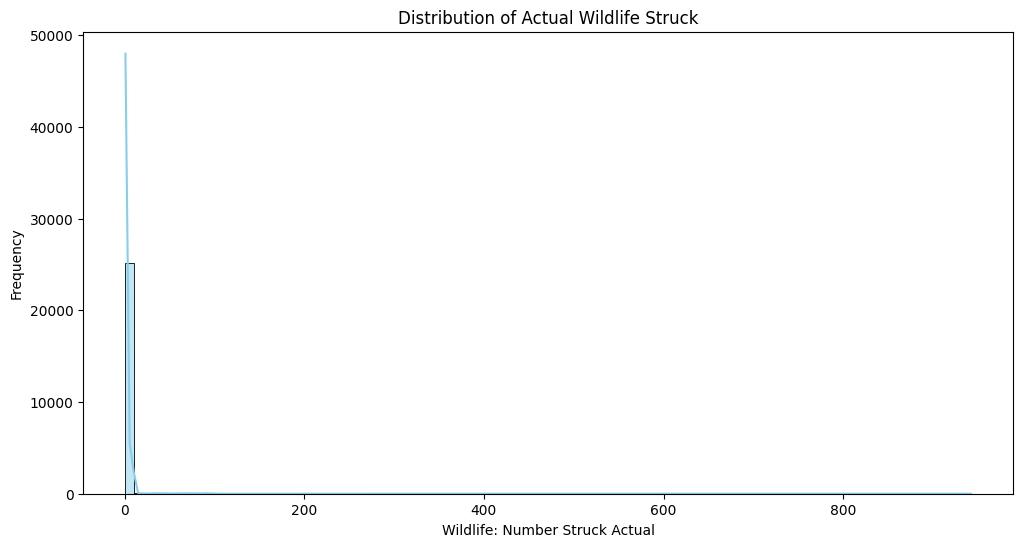

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Wildlife: Number Struck Actual'], bins=100, kde=True, color='skyblue')

plt.title('Distribution of Actual Wildlife Struck')
plt.xlabel('Wildlife: Number Struck Actual')
plt.ylabel('Frequency')
plt.show()


This distribution suggests that:

Most wildlife strike incidents involve very few animals (likely single digits).
Incidents involving large numbers of wildlife strikes are extremely rare.
There's a high variability in the number of wildlife struck, but with a strong tendency towards low numbers.

In [24]:
# Convert 'Wildlife: Number Struck Actual' to numeric, coercing errors to NaN
df['Wildlife: Number Struck Actual'] = pd.to_numeric(df['Wildlife: Number Struck Actual'], errors='coerce')


In [25]:
# Group by 'Airport: Name' and sum 'Wildlife: Number struck'
airport_incidents = df.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum()

# Convert to DataFrame for easier manipulation
airport_incidents = airport_incidents.reset_index()

# Sort by number of incidents in descending order
airport_incidents = airport_incidents.sort_values(by='Wildlife: Number Struck Actual', ascending=False)


In [26]:
# Get top 50 airports with the most bird strike incidents
top_50_airports = airport_incidents.head(50)


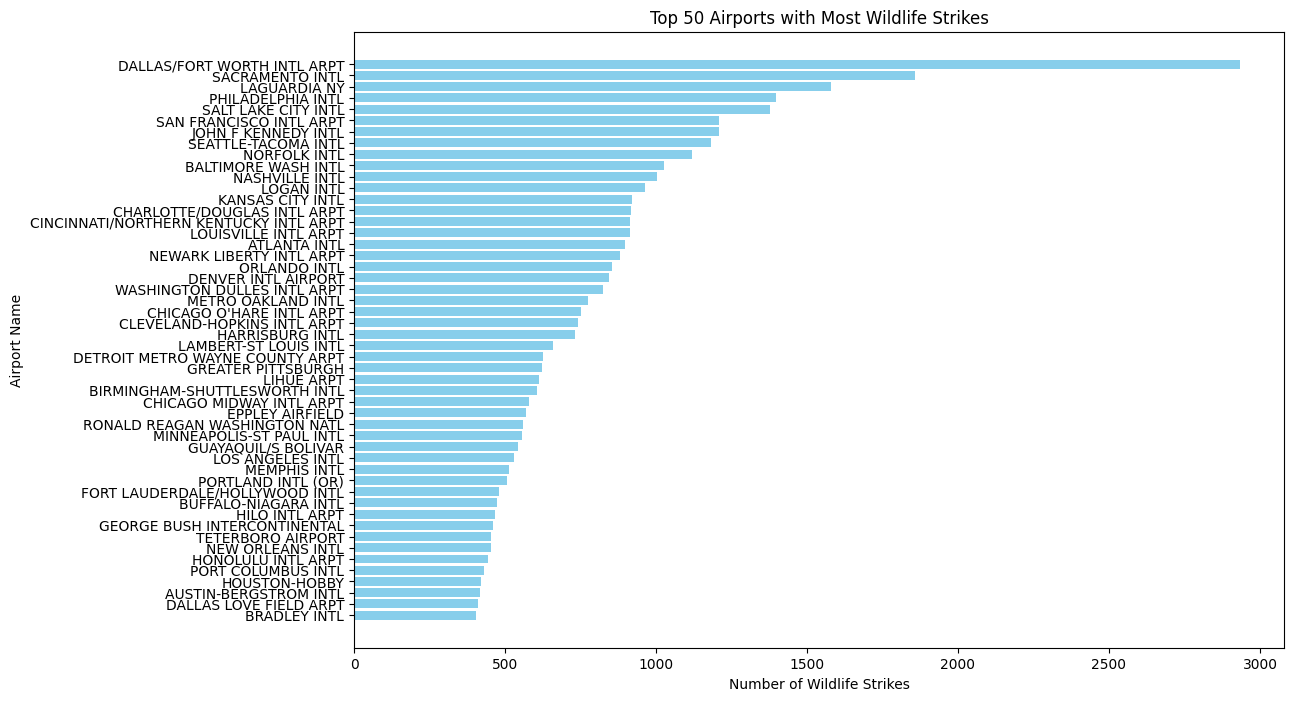

In [27]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_50_airports['Airport: Name'], top_50_airports['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Number of Wildlife Strikes')
plt.ylabel('Airport Name')
plt.title('Top 50 Airports with Most Wildlife Strikes')
plt.gca().invert_yaxis()  # Invert y-axis to have the airport with the most strikes on top
plt.show()


Dallas/Fort Worth International Airport has the highest number of wildlife strikes, as indicated by the longest bar at the top.
There's a gradual decrease in the number of strikes as you move down the list.
The graph allows for easy comparison between airports. For example, you can quickly see that Sacramento International has the second-highest number of strikes.
Some major airports like Chicago O'Hare, JFK, and San Francisco International are in the upper half of the list, indicating they experience a significant number of wildlife strikes.
The bottom of the list includes smaller or less busy airports like Bradley International, which have fewer reported wildlife strikes.